In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\MAHA-PC\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def calculate_uncertainty(predictions):
    entropy = -np.sum(predictions * np.log(predictions + 1e-12), axis=1)
    return entropy

In [3]:
model = tf.keras.models.load_model('train_model.keras')

C:\Users\MAHA-PC\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:394: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [4]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_dataset = validation_datagen.flow_from_directory(
    'Validation/Validation',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 60 images belonging to 3 classes.


In [5]:
validation_predictions = model.predict(validation_dataset)
uncertainties = calculate_uncertainty(validation_predictions)

C:\Users\MAHA-PC\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 8s/step


In [6]:
num_samples_to_label = 10
selected_indices = np.argsort(uncertainties)[-num_samples_to_label:]

In [7]:
validation_data_array = []
validation_labels_array = []
for i in range(len(validation_dataset)):
    batch = validation_dataset[i]
    validation_data_array.append(batch[0])
    validation_labels_array.append(batch[1])
validation_data_array = np.concatenate(validation_data_array)
validation_labels_array = np.concatenate(validation_labels_array)

In [8]:
selected_samples = validation_data_array[selected_indices]
selected_labels = validation_labels_array[selected_indices]

In [25]:
train_data_array = []
train_labels_array = []
for i in range(len(train_data)):
    batch = train_data[i]
    train_data_array.append(batch[0])
    train_labels_array.append(batch[1])
train_data_array = np.concatenate(train_data_array)
train_labels_array = np.concatenate(train_labels_array)

In [27]:
train_data = np.concatenate((train_data_array, selected_samples))
train_labels = np.concatenate((train_labels_array, selected_labels))

In [28]:
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(validation_data_array, validation_labels_array))

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.3382 - loss: 1.1849 - val_accuracy: 0.6667 - val_loss: 0.6599
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.6299 - loss: 0.7035 - val_accuracy: 0.6833 - val_loss: 0.5815
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.6759 - loss: 0.5955 - val_accuracy: 0.7667 - val_loss: 0.4239
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.8315 - loss: 0.4331 - val_accuracy: 0.7500 - val_loss: 0.6232
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.8686 - loss: 0.3456 - val_accuracy: 0.8833 - val_loss: 0.2425
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.9349 - loss: 0.1998 - val_accuracy: 0.9500 - val_loss: 0.1910
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.9229 - loss: 0.2806 - val_accuracy: 0.9833 - val_loss: 0.0530
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.9516 - loss: 0.1363 - val_accuracy: 0.9833 - val_loss:

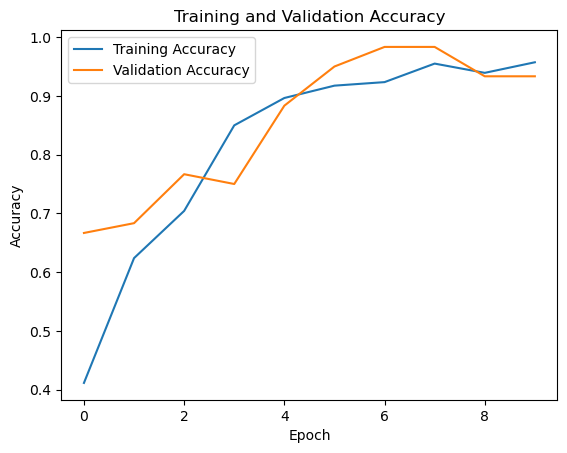

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [30]:
model.save("AL_uncertainty_method.keras")